# Exercise 04 Classification I - Solution

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [1]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Part 1. Logistic regression with a toy dataset

This part will buid a binary classifier using the logistic regression algorithm with a toy dataset.
The aim of this part is to master how to implement logistic regression using `sklearn` and how to calculate various evaluation metrics.

### Load dataset

In this part, we will use a toy dataset provided by `sklearn`: the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

he breast cancer dataset is a classic and very easy binary classification dataset. You can find the original source of this dataset [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

There are 30 numeric features in the dataset that might be useful for diagnosing breast cancer. These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

The features include:
- radius
- texture
- perimeter
- area
- smoothness
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

Each example is corresponding to a digitized image with multiple cell nucleus. The above features of each cell nuclei are summarized as a mean value, a worst value and a standard variation.

There are two classes in this dataset: 1 (WDBC-Malignant) and 0 (WDBC-Benign).

Load this dataset using `sklearn.datasets.load_breast_cancer`, you can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [2]:
# load dataset
feature_df, target_df = datasets.load_breast_cancer(
    return_X_y = True,
    as_frame = True
)

In [3]:
# get the basic information of the features
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are too many features in the dataset, some of them are highly correlated with each other. For example, the mean value and worst value might be highly correlated.

To simply the problem, we only keep the mean values as the input features and eliminate the worst values and standard deviations.

In [4]:
# keep the last 10 columns as the input features
feature_df = feature_df[feature_df.columns[:10]]
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           569 non-null    float64
 9   mean fractal dimension  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


In [5]:
# print the target class
target_df

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [6]:
# check imbalanced classes
print("Numver of negative class:", sum(target_df == 0))
print("Numver of positive class:", sum(target_df == 1))

Numver of negative class: 212
Numver of positive class: 357


### Train test split

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Train the model

We will train a logistic regression model to perform binary classification.

Use `sklearn.linear_regression.LogisticRegression` to implement logistic regression.

Logistic regression model outputs the probability of an example belongs to a category. We need to specify a threshold to convert the predicted probabilities to discrete categories.

`sklearn.linear_regression.LogisticRegression` set the default threshold to 0.5

In [8]:
# fit the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

### Evaluate the model

To evaluate the model performance on the testing dataset, we need to use the trained model to make predictions at first. There are two types of prediction can be made:
- method `predict_proba()` output the predicted probability
- method `predict()` output the predicted category by setting the threshold to 0.5

In [9]:
# predict probability for the first five examples in the testing dataset
clf.predict_proba(X_test[:5, :])

array([[0.45704261, 0.54295739],
       [0.17939514, 0.82060486],
       [0.08661718, 0.91338282],
       [0.16525119, 0.83474881],
       [0.05373735, 0.94626265]])

The output is a 2D array.
- The first column is the probability of being 0 (the negative class)
- The second column is the probability of being 1 (the positive class)
- The sum of each row is equal to 1

In [10]:
# predict the category for the first five examples in the testing dataset
clf.predict(X_test[:5, :])

array([1, 1, 1, 1, 1])

The output is a 1D array consists of predicted categories.
- 0 represent the negative class
- 1 represent the positive class
- The default threshold is 0.5

In [11]:
# make predictions for the entire testing dataset
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

#### Confusion matrix

Compute confusion matrix using `sklearn.metrics.confusion_matrix`.

Visualization confusion matrix using `sklearn.metrics.ConfusionMatrixDisplay`.

In [12]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 55   8]
 [  6 102]]


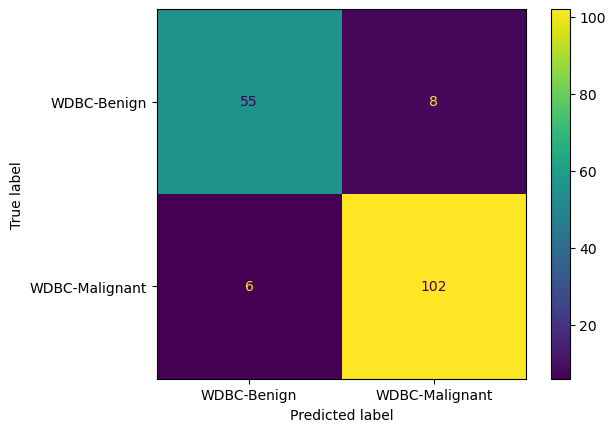

In [13]:
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['WDBC-Benign', 'WDBC-Malignant']
)
disp.plot()
plt.show()

#### Accuracy, precision, recall & F1-score

We can calculate these metrics manually using the confusion matrix.

Or we can `sklearn` to automatically perform the calculation:
- `sklearn.metrics.accuracy_score`
- `sklearn.metrics.precision_score`
- `sklearn.metrics.recall_score`
- `sklearn.metrics.f1_score`

In [14]:
# calculate the metrics manually
accuracy_test = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision_test = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall_test = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_test = 2 * precision_test * recall_test / (precision_test + recall_test)

# print the metrics
print("Accuracy:\t", accuracy_test)
print("Precision:\t", precision_test)
print("Recall:\t\t", recall_test)
print("F1-score:\t", f1_test)

Accuracy:	 0.9181286549707602
Precision:	 0.9272727272727272
Recall:		 0.9444444444444444
F1-score:	 0.9357798165137615


In [15]:
# calcualte the metrics by sklearn
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

Accuracy:	 0.9181286549707602
Precision:	 0.9272727272727272
Recall:		 0.9444444444444444
F1-score:	 0.9357798165137615


In [16]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.93      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



#### RoC curve & AUC

Use `sklearn.metrics.roc_curve` to compute the ROC curve.
Use `sklearn.metrics.roc_auc_score` to calculate the AUT metric.

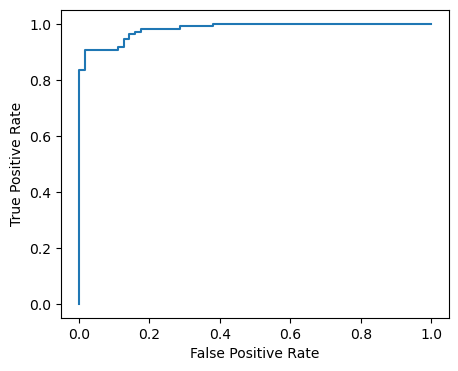

In [17]:
# compute ROC curve
fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [5, 4])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [18]:
# calculate AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

AUC:	 0.982363315696649


## Part 2. Hands-on exercise

In this exercise, we will build a logistic regression model with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02 & 04.

The goal of the logistic regression model is to perform a binary classification taks:
- 0 represent 'Normal Price'
- 1 represent 'Expensive Price'

Since there is no such categorical columns in the dataset, we need to create the target labels according to the `MedHouseVal`, which used to be the target variable for regression problem.
- `MedHouseVal` <= 2.5 $\rightarrow$ 'Normal Price'
- `MedHouseVal` > 2.5 $\rightarrow$ 'Expensive Price'

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Load the California Housing Dataset
- Create target labels
- Split the dataset into the training and testing part
- Train the logistic regression model
- Evaluate the trained model with various metrics

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [19]:
# [TBC] complete your code here with proper comments
feature_df, target_df = datasets.fetch_california_housing(return_X_y = True, as_frame = True)

### Task 2. Create the target labels

<span style="color:red">**[TBC]**</span> Use `MedHouseVal` as the reference to create a pandas series as the new targel variable.

In [20]:
# [TBC] complete your code here with proper comments
target_df = target_df > 2.5
target_df

0         True
1         True
2         True
3         True
4         True
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: MedHouseVal, Length: 20640, dtype: bool

### Task 3. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [21]:
# [TBC] complete your code here with proper comments
X_train, X_test, y_train, y_test = train_test_split(feature_df.values, target_df.values, train_size = 0.7, random_state = 0)

### Task 4. Train the logistic regression model
<span style="color:red">**[TBC]**</span> Please use `sklearn.linear_regression.LogisticRegression` to implement logistic regression and train the binary classifier.

In [22]:
# [TBC] complete your code here with proper comments
clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/tzhang/anaconda3/envs/ml-course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Task 5. Evaluate the trained model with various metrics

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- make predictions for the testing dataset
- compute and visualize the confusion matrix
- calculate accuracy, precision, recall, and F1-score
- compute the ROC curve and AUC
- analysis the performance of this classifier

In [23]:
# [TBC] complete your code here with proper comments
# make predictions for the testing dataset
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

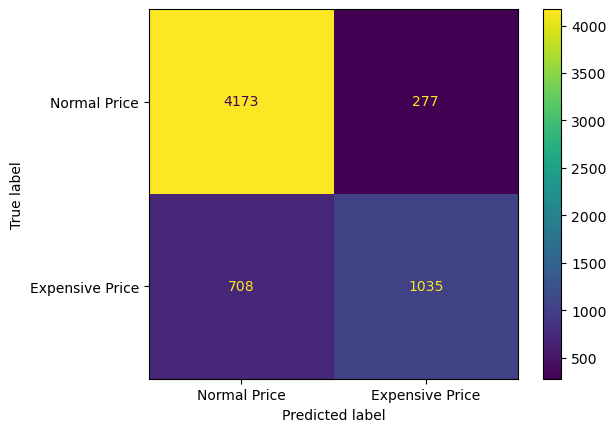

In [24]:
# [TBC] complete your code here with proper comments
# compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Normal Price', 'Expensive Price']
)
disp.plot()
plt.show()

In [25]:
# [TBC] complete your code here with proper comments
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.94      0.89      4450
        True       0.79      0.59      0.68      1743

    accuracy                           0.84      6193
   macro avg       0.82      0.77      0.79      6193
weighted avg       0.84      0.84      0.83      6193



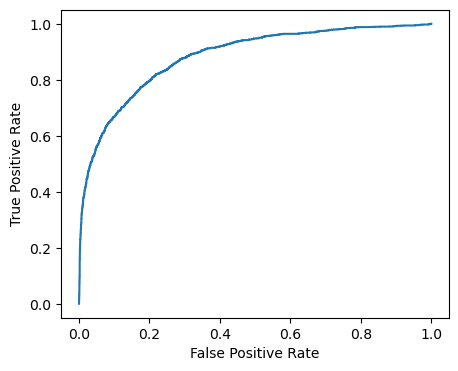

In [26]:
# [TBC] complete your code here with proper comments
# compute ROC curve
fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [5, 4])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [27]:
# [TBC] complete your code here with proper comments
# calculate AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

AUC:	 0.8829869719649062


<span style="color:red">**[TBC]**</span> Write your analysis here.

- The two classes are imbalanced in the dataset, block groups with 'Expensive Price' only counts for 28%.
- Therefore, even though the accuracy is 0.84, which seems to be good, the binary classifier still has troubles for detecting block groups with 'Expensive Price'.
- Recall is only 0.59, indicates almost 41% of the block groups with 'Expensive Price' are misclassified as 'Normal Price'. It means, the classifier is not trustworthy regarding detecting 'Expensive Price'.
- However, according to the ROC curve and AUC, the overall performance of the classifier regardless thresholds is not bad. So the default threshold value (0.5) may not be the best choice in this case, it failed to balance the precision (0.79) and the recall (0.59). If we value recall more than precision, we can try to decrease the threshold to have a better recall, but worse precision.

In [28]:
# if we think the point on the ROC curve that is closest to (0,1) is the best point we need
# we can use this code the get the threshold corresponding to this point
best_threshold = thresholds[np.argmin((1 - tpr) ** 2 + fpr ** 2)]
best_threshold

0.26412058381974146

In [29]:
# then we can use this threshold instead of the default 0.5 to perform the classification
y_pred_new = y_pred_proba[:,1] > best_threshold
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

       False       0.91      0.79      0.85      4450
        True       0.60      0.81      0.69      1743

    accuracy                           0.80      6193
   macro avg       0.76      0.80      0.77      6193
weighted avg       0.83      0.80      0.80      6193



We find that the recall is improved from 0.59 to 0.81.

But the precision is only 0.6.

Based on your preference, you can finetune the threshold to align the performance with your needs.

### Challenge. Build a multi-class classifier using Logistic Regression

`sklearn.linear_model.LogisticRegression` can also be used to build a multi-class classifier.

Instead of having binary class as the target, create the target labels as follows:
- 0 represents 'Low Price', 'MedHouseVal' < 1
- 1 represents 'Normal Price', 1 <= 'MedHouseVal' <= 2.5
- 2 represents 'Expensive Price', 'MedHouseVal' > 2.5

Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) here and train a multi-class classifier following the one-vs-rest scheme.

Compute the confusion matrix, accuracy, precision, recall, f1_score, ROC curve and AUC in the context of multi-class classification. If you get confused by the multi-class situation, read this [blog](https://www.v7labs.com/blog/confusion-matrix-guide) will help.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

/Users/tzhang/anaconda3/envs/ml-course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


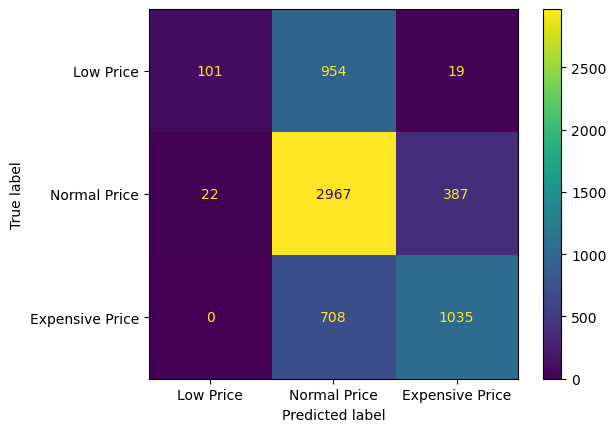

In [30]:
# [TBC] complete your code here with proper comments

# load dataset
feature_df, target_df = datasets.fetch_california_housing(return_X_y = True, as_frame = True)

# convert 'MedHouseVal' into discrete categories
def target_encoding(x):
    if x < 1:
        return 0
    if x > 2.5:
        return 2
    return 1
target_df = target_df.apply(target_encoding)

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    random_state = 0
)

# fit the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# make predictions for the testing dataset
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Low Price', 'Normal Price', 'Expensive Price']
)
disp.plot()
plt.show()

In [31]:
# [TBC] complete your code here with proper comments
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.09      0.17      1074
           1       0.64      0.88      0.74      3376
           2       0.72      0.59      0.65      1743

    accuracy                           0.66      6193
   macro avg       0.73      0.52      0.52      6193
weighted avg       0.69      0.66      0.62      6193



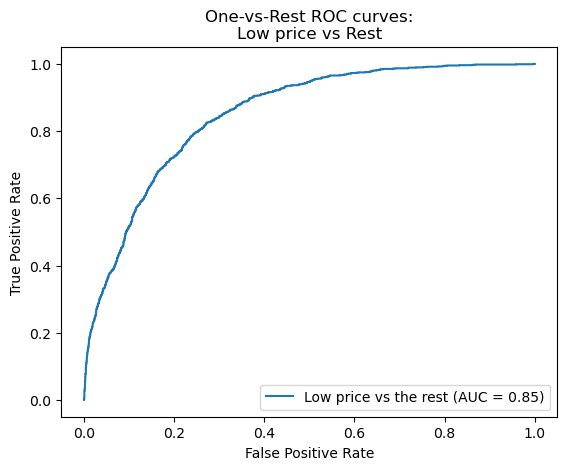

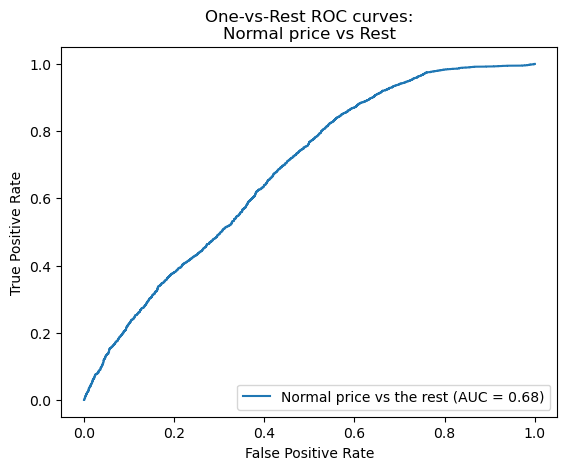

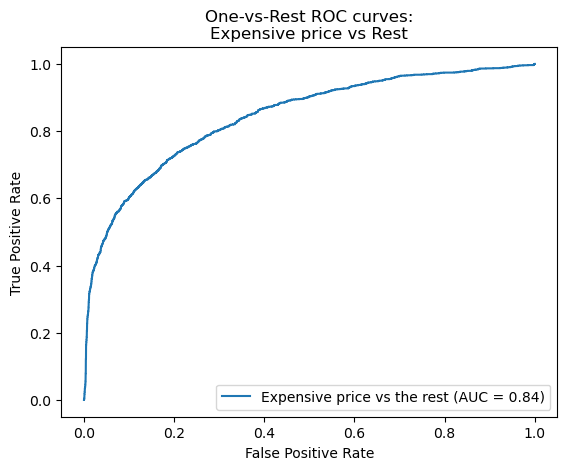

In [32]:
# [TBC] complete your code here with proper comments
# One-vs-Rest multiclass ROC

# import libraries
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

# construct three new target columns, each represent a one-vs-rest binary classification problem
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
class_names = ['Low price', 'Normal price', 'Expensive price']

# Plot ROC curve for each class following the One-ve-Rest scheme
for class_id in [0, 1, 2]:
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id], # true classes
        y_pred_proba[:, class_id], # predicted probabilities
        name = f"{class_names[class_id]} vs the rest"
    )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-vs-Rest ROC curves:\n' + class_names[class_id] + ' vs Rest')
    plt.show()

In [33]:
# [TBC] complete your code here with proper comments
# calculate class-wise AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba,
    average = None,
    multi_class = 'ovr'
)

# the results should be the same as the above figures
print("AUC for 'Low Price':\t\t", auc_test[0])
print("AUC for 'Normal_price':\t\t", auc_test[1])
print("AUC for 'Expensive_Price':\t", auc_test[2])

AUC for 'Low Price':		 0.8500610970994612
AUC for 'Normal_price':		 0.6815850826145254
AUC for 'Expensive_Price':	 0.8422679481972835
